<a href="https://colab.research.google.com/github/jimmycard/Air-BnB-Newyork/blob/main/Microsoft_StockPrice_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microsoft Stock Price prediction using the LSTM(Long short-term memory) neural network.

In this project, we employed the LSTM neural network to predict Microsoft stock prices. LSTM, which stands for long short-term memory, is an advanced variant of the traditional recurrent neural network (RNN).

LSTM models are particularly adept at learning long-term dependencies in sequence prediction problems. They excel in recognizing patterns within data sequences, such as sensor data, stock prices, or natural language, by incorporating both the actual value and its position in the sequence during prediction.

What sets LSTM models apart is their unique architecture, enabling them to determine whether to retain or discard previous information in short-term memory. This capability allows them to effectively capture even longer dependencies within sequences.

By leveraging the power of LSTM networks, we aimed to predict Microsoft stock prices by uncovering patterns and dependencies in the historical data. This approach enables us to make informed forecasts and gain insights into potential future price movements.


# Dataset

This project focuses on the exploration of the Microsoft stock data, which offers a wealth of information to unravel the intricacies of the stock market. The dataset comprises key variables that will guide our analysis.

The "Date" column serves as our timeline, enabling us to observe trends and patterns over time. The "Open Price" variable signifies the initial trading price, setting the stage for daily gains or losses. "High Price" and "Low Price" capture the price range, revealing market volatility and investor sentiment.

The "Closing Price" column denotes the day's final stock price, encapsulating market sentiment and the cumulative impact of various market forces. The "Adjusted Closing Price" considers factors like stock splits and dividends, providing an accurate representation of the stock's performance.

The "Volume" column reflects the number of shares traded, shedding light on market liquidity and investor interest.

Through this dataset, we aim to analyze trends, assess risk, and explore the interplay of market variables, ultimately uncovering valuable insights to make informed decisions.



In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('MSFT.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [ ]:
df.shape

(9083, 7)

#### Basic overview about the stock price performance.

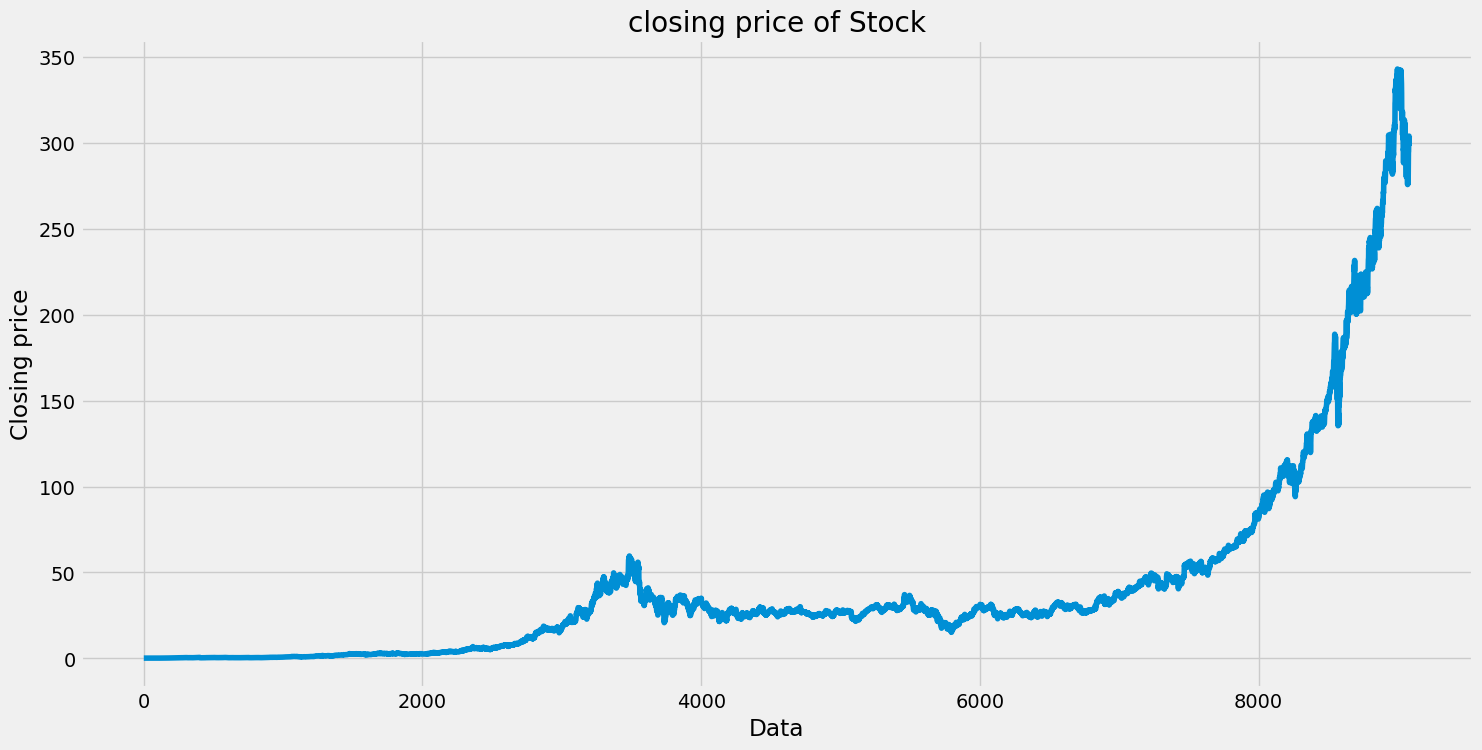

In [ ]:
#visualize the closing prices to get a general idea about the stock price.
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

By examining this chart, we can observe the remarkable growth of Microsoft stock, starting from under a dollar and reaching a trading price of approximately $300.

In [ ]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the new dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
# get the number of rows for the 80% training data.
training_data_len

7267

When working with neural networks, it is crucial to scale the data for optimal performance. Failing to scale the data can lead to subpar results. To address this, we will apply a standard scaler to the training data. First, we create an instance of the standard scaler and use it to scale the data. By employing the fit and transform functions on the training data, we obtain the scaled data. This scaling process ensures that the mean and standard deviation of the data are normalized to the range of 0 to 1, which aids in the neural network's effectiveness.

In [ ]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [ ]:
#create a new training data from the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [ ]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [ ]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In our project, we will be utilizing the sequential model for our neural network. Let's start by adding the first LSTM layer, which will consist of 200 neurons. The input shape for this layer will correspond to the number of input neurons in X train, ensuring compatibility.

Following that, we will add another LSTM layer, also with 200 neurons, resulting in a total of two LSTM layers. This layer configuration will help capture complex patterns and dependencies in the data.

Moving on, we will incorporate two dense layers into our model. The first dense layer will comprise 100 neurons, allowing for further feature extraction and representation. The second dense layer will consist of 50 neurons, enhancing the model's capacity to learn intricate relationships.

Lastly, we will add a dense layer of 1, serving as the output layer. This layer will produce a single output, enabling us to make predictions or classifications based on the network's learned representations.

By structuring our neural network in this manner, we aim to leverage the power of LSTM layers and dense layers to effectively capture and model the underlying patterns within our data.

In [ ]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

To proceed, we will compile the model and optimize it using the Adam optimizer, which is well-suited for a variety of deep learning tasks. Given that we are dealing with a regression problem, we will employ the mean squared error (MSE) as our loss metric. This choice aligns with our goal of minimizing the average squared difference between the predicted and actual values.

By utilizing the Adam optimizer and MSE loss metric, we can effectively train our model to make accurate predictions for our regression problem. This combination of optimization and loss function selection ensures that our model is optimized to minimize the error between predicted and actual values, ultimately enhancing its performance and ability to tackle regression tasks.

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


The model summary reveals that there are 507,601 trainable parameters, indicating the adjustable elements for learning. However, there are no non-trainable parameters present in the model, meaning all parameters can be updated during the training process.

In [ ]:
#train the model. this model with five epochs. You can increase the number of epochs for better performance of the model.
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 100s 386ms/step - loss: 0.0025
Epoch 2/5
226/226 [==============================] - 81s 360ms/step - loss: 2.3425e-04
Epoch 3/5
226/226 [==============================] - 79s 346ms/step - loss: 2.0978e-04
Epoch 4/5
226/226 [==============================] - 79s 352ms/step - loss: 1.9216e-04
Epoch 5/5
226/226 [==============================] - 78s 345ms/step - loss: 1.8265e-04


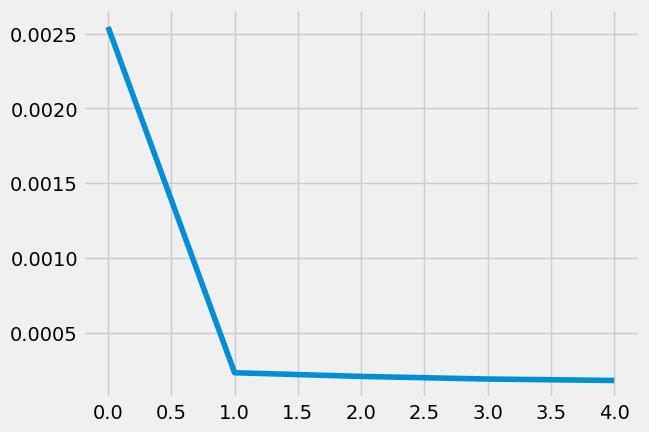

In [ ]:
#plot the history of loss.
plt.plot(history.history['loss'])

The loss on the chart consistently decreased with each epoch, indicating a steady improvement in the model's performance over time.

In [ ]:
#create the testing dataset
#createt new array. test data is equal to scale data of training data length -60 including all columns.
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to numpy
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value. check the predictions on X test
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 7s 110ms/step
[[ 45.93832 ]
 [ 45.990284]
 [ 46.143597]
 ...
 [249.89874 ]
 [253.1303  ]
 [255.29483 ]]


These predictions represent the Microsoft stock prices generated by the LSTM model using the X test data.

In [ ]:
predicted_price = pd.DataFrame(predictions, columns = ['price'] )
predicted_price.head()

,price
0,45.938320
1,45.990284
2,46.143597
3,46.231255
4,46.233696


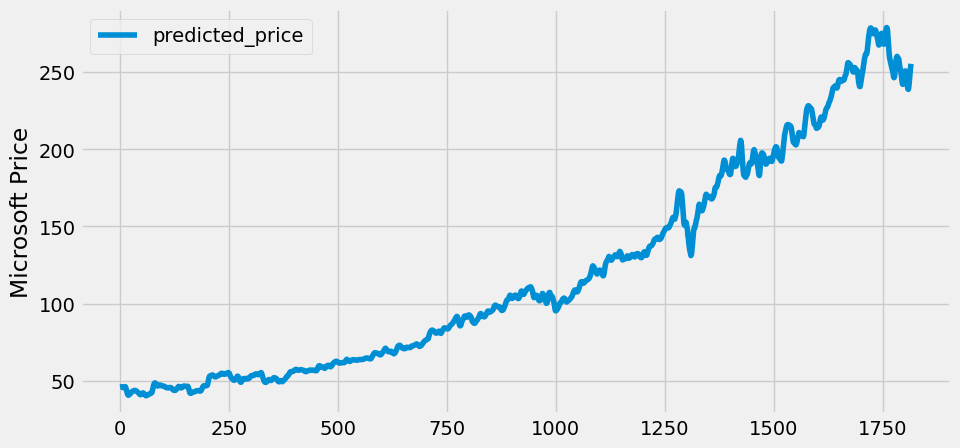

In [ ]:
#Plot the predicted price of apple stock
predicted_price.plot(figsize=(10,5))
plt.legend(['predicted_price'])
plt.ylabel("Microsoft Price")
plt.show()

Analyzing the chart, we observe that the predicted price of Microsoft stock initiated at $45 and is projected to gradually ascend, surpassing 250 at its peak before experiencing a decline. This prediction suggests a positive trend in the stock's value over the given time period. It indicates potential growth opportunities for investors, reaching a substantial price level before a subsequent downturn. The chart provides a visual representation of the predicted price trajectory, aiding in decision-making and assessing investment strategies related to Microsoft stock.

In [ ]:
x_test.shape

(1816, 60, 1)